'NimbusRoman-Regular.otf' can not be subsetted into a Type 3 font. The entire font will be embedded in the output.


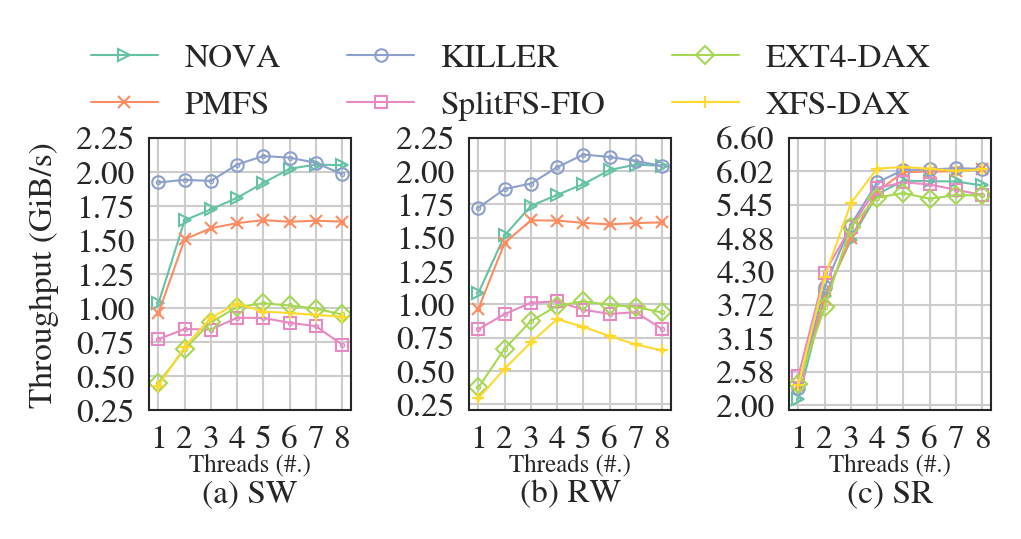

In [79]:
# ipython -c "%run plot.ipynb"

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import pandas as pd
import numpy as np
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Paper specific settings
STANDARD_WIDTH = 17.8
SINGLE_COL_WIDTH = STANDARD_WIDTH / 2
DOUBLE_COL_WIDTH = STANDARD_WIDTH
def cm_to_inch(value):
    return value/2.54
    
# matplotlib style settings
matplotlib.rcParams['text.usetex'] = False
style.use('seaborn-white')
plt.rcParams["axes.grid"] = True
plt.rcParams["axes.grid.axis"] = "both"
plt.rcParams["grid.linewidth"] = 0.5
plt.rcParams["font.family"] = "Nimbus Roman"
pd.options.display.max_columns = None
pd.options.display.max_rows = None


# Data Preprocessing
# with open("./avg-test-result-in-paper", "r") as f:
with open("./performance-comparison-table", "r") as f:
    df = pd.read_csv(f, delim_whitespace=True, index_col=None, engine='python')
# Plotting Settings
fig = plt.figure(dpi = 300, figsize = (cm_to_inch(SINGLE_COL_WIDTH), cm_to_inch(4)))

line_width = 0.5
# colors = ["#2b2d42", "#8d99ae", "#1a535c", "#ef233c", "#4ecdc4"]
marks = [">", "x", "o", "s", "D", "+"]
subtitles = ["(a) SW", "(b) RW", "(c) SR"]
fss = df['file_system'].drop_duplicates().reset_index().drop(columns=['index'])['file_system']
ops = ["seq-write", "rnd-write", "seq-read"]
num_jobs = list(range(1, 9))

def zoom_in(axins, x, ys, zone_left, zone_right):
    # 坐标轴的扩展比例（根据实际数据调整）
    x_ratio = 0.1 # x轴显示范围的扩展比例
    y_ratio = 0.5 # y轴显示范围的扩展比例

    # X轴的显示范围
    xlim0 = x[zone_left]-(x[zone_right]-x[zone_left])*x_ratio
    xlim1 = x[zone_right]+(x[zone_right]-x[zone_left])*x_ratio

    stack = []
    for y in ys:
        stack.append(y[zone_left:zone_right])
    y = np.hstack(stack)
    ylim0 = np.min(y)-(np.max(y)-np.min(y))*y_ratio
    ylim1 = np.max(y)+(np.max(y)-np.min(y))*y_ratio

    # 调整子坐标系的显示范围
    axins.set_xlim(xlim0, xlim1)
    axins.set_ylim(ylim0, ylim1)

for op_idx, op in enumerate(ops):
    subfig = plt.subplot(1, 3, op_idx + 1)
    for idx, fs in enumerate(fss):
        plt.plot(num_jobs, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, color=plt.get_cmap('Set2')(idx), markerfacecolor='none', linewidth= line_width,label=fs, marker=marks[idx], markeredgecolor=plt.get_cmap('Set2')(idx), markersize=3, markeredgewidth=0.5)
        plt.scatter(num_jobs, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, color=plt.get_cmap('Set2')(idx), s=0.1)
    ax = fig.gca()
    lw = 0.5
    for axis in ['top','bottom','left','right']:
        ax.spines[axis].set_linewidth(lw)
    plt.xticks(num_jobs, labels=num_jobs, fontsize=8)
    
    if op_idx == 0:
        plt.ylabel('Throughput (GiB/s)', fontsize=8)
    if op_idx == 0 or op_idx == 1:
        plt.yticks(np.linspace(0.25, 2.25, 9), fontsize=8)
    else:
        plt.yticks(np.linspace(2, 6.6, 9), fontsize=8)
        ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
    subfig.text(0.5, -0.2, "Threads (#.)", ha='center', va='center', fontsize=6, transform=subfig.transAxes)
    plt.xlabel(subtitles[op_idx], fontsize=8, labelpad=6) 
        # axins = ax.inset_axes((0.45, 0.1, 0.5, 0.5))
        # ys = []
        # for idx, fs in enumerate(fss):
        #     y = list(df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024)
        #     axins.plot(num_jobs, y, color=plt.get_cmap('Set2')(idx), markerfacecolor='none', linewidth=line_width,label=fs, marker=marks[idx], markeredgecolor=plt.get_cmap('Set2')(idx), markersize=3, markeredgewidth=0.5)
        #     ys.append(y)
        #     axins.scatter(num_jobs, df[(df['file_system'] == fs) & (df['ops'] == op)]['bandwidth(MiB/s)'] / 1024, color=plt.get_cmap('Set2')(idx), s=0.1)
        # zoom_in(axins, num_jobs, ys, 5, 7)
        # axins.set_xticks([6, 7, 8])
        # axins.set_xticklabels([6, 7, 8], fontsize=6)
        
        # axins.set_yticks(np.linspace(5.5, 6.2, 3))
        # axins.set_yticklabels(np.linspace(5.5, 6.2, 3), fontsize=6)
        # axins.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.1f'))

        # lw = 0.5
        # for axis in ['top','bottom','left','right']:
        #     axins.spines[axis].set_linewidth(lw)
 
fig.legend(fss, loc='center', bbox_to_anchor=(0.5, 1), ncol=3, fontsize=8)
plt.tight_layout()
plt.savefig("./FIG-Concurrency.pdf", bbox_inches='tight', pad_inches=0)
